# 决策树sklearn实现及参数讲解

In [1]:
# 数据读取以及xy提取
import pandas as pd
import matplotlib.pyplot as plt
# 样例数据读取
df = pd.read_excel('realestate_sample_preprocessed.xlsx')
# 根据共线性矩阵，保留与房价相关性最高的日间人口，将夜间人口和20-39岁夜间人口进行比例处理
def age_percent(row):
    if row['nightpop'] == 0:
        return 0
    else:
        return row['night20-39']/row['nightpop']
df['per_a20_39'] = df.apply(age_percent,axis=1)
df = df.drop(columns=['nightpop','night20-39'])
# 制作标签变量
price_median = df['average_price'].median()
df['is_high'] = df['average_price'].map(lambda x: True if x>= price_median else False)
print(df['is_high'].value_counts())
# 数据集基本情况查看
print(df.shape)
print(df.dtypes)
# 划分数据集
x = df[['complete_year','area', 'daypop', 'sub_kde',
       'bus_kde', 'kind_kde','per_a20_39']]
y = df['is_high']
print(x.shape)
print(y.shape)

True     449
False    449
Name: is_high, dtype: int64
(898, 10)
id                 int64
complete_year      int64
average_price    float64
area             float64
daypop           float64
sub_kde          float64
bus_kde          float64
kind_kde         float64
per_a20_39       float64
is_high             bool
dtype: object
(898, 7)
(898,)


In [46]:
##### 构建决策树模型
from sklearn.tree import DecisionTreeClassifier
# 如果是回归问题，就要引入回归模型
from sklearn.tree import DecisionTreeRegressor
# 建立模型
clf_tree = DecisionTreeClassifier(criterion='gini',
                                  splitter='best',
                                  max_depth=4,
                                  #min_samples_split=3,
                                  #min_samples_leaf=5,
                                  #max_features=None,
                                  max_leaf_nodes=7,
                                  #min_impurity_decrease=0.0,
                                  #min_impurity_split=None,
                                  class_weight=None)
# 训练决策树模型
clf_tree.fit(x,y)
print(clf_tree)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=7, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


### 决策树参数讲解
criterion：划分算法 默认是gini,另外一种是entropy就是信息增益, 回归模型可以选择mse或mae

splitter：两个选择，best或者random。

max_features：控制所搜的特征数量

max_depth: 控制树的深度

min_samples_split: 任意节点样本量达到多少的时候就不再分裂

min_samples_leaf：每一个叶子上最少的样本数

max_leaf_nodes：最大叶节点数量

min_impurity_decrease: 切分点不纯度最小减少程度

min_impurity_split: 切分点最小不纯度

class_weight：指定样本各类别的的权重

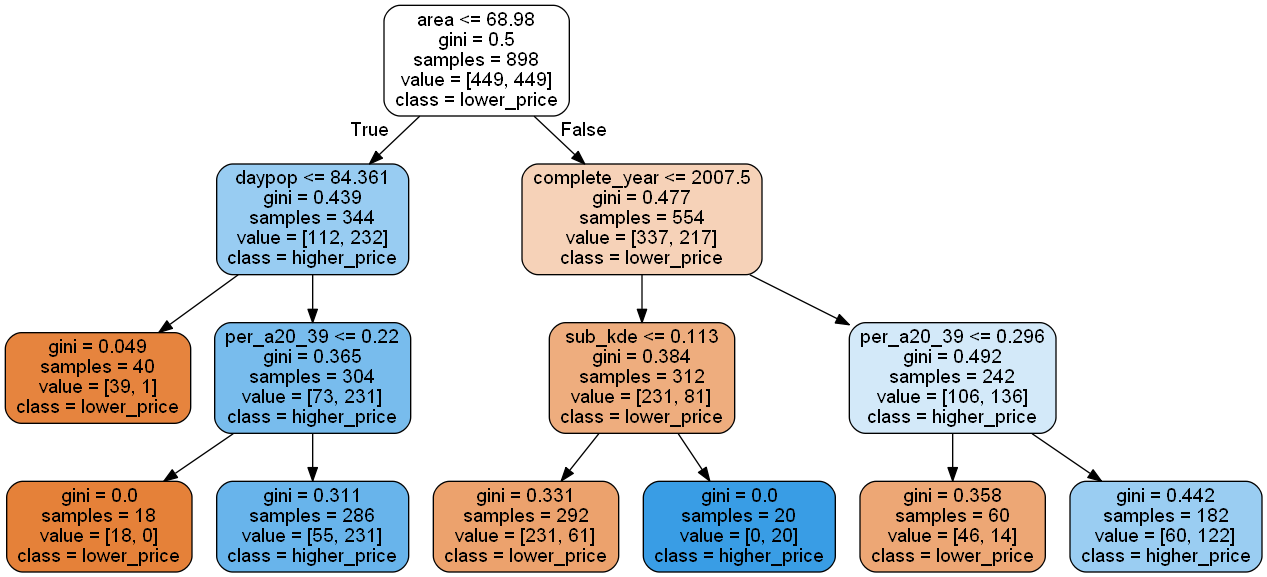

In [47]:
import graphviz
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\graphviz2.38\bin'
from IPython.display import Image  
import pydotplus
features = ['complete_year','area', 'daypop', 'sub_kde',
       'bus_kde', 'kind_kde','per_a20_39']
classes=['lower_price','higher_price']
# 定义图像
from sklearn import tree
tree_graph_data = tree.export_graphviz(clf_tree,
                    feature_names=features,
                     class_names=classes,
                    filled=True,
                    rounded=True)
# 绘图：
tree_graph = pydotplus.graph_from_dot_data(tree_graph_data)
Image(tree_graph.create_png())